*Author: Sabareenath S Pillai*
# TASK1 : STOCK PREDICTION

## Nestle Stock Prediction

**This dataset contains historical data of Google's stock prices and related attributes. It consists of 13 columns and a smaller subset of 2553 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.** 


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df=pd.read_csv("nestle.csv")

In [3]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30


In [5]:
closed_price=df['Close Price']
closed_price.head()

0    18205.80
1    18313.70
2    17943.15
3    18549.85
4    18343.90
Name: Close Price, dtype: float64

In [6]:
sc=MinMaxScaler()
closed_price=sc.fit_transform(np.array(closed_price).reshape(-1,1)).squeeze()

In [7]:
train_size=int(len(closed_price)*0.8)
test_size=len(closed_price)-train_size

train,test=closed_price[0:train_size],closed_price[train_size:len(closed_price)]

In [8]:
def create(dataset,seq_len):
    x,y=[],[]
    for i in range(len(dataset)-seq_len-1):
        x.append(dataset[i:i+seq_len])
        y.append(dataset[i+seq_len])
    return np.array(x),np.array(y)

seq_len=10
xtrain,ytrain=create(train,seq_len)
xtest,ytest=create(test,seq_len)

In [9]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest=np.reshape(xtest,(xtest.shape[0],1,xtest.shape[1]))

In [10]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,seq_len)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 5ms/step - loss: 0.1787
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1557
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1327
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1101
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0701
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0379
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0249
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0228
Epoch 13/100
7/7 [==============================] - 0s 4ms/st

In [11]:
trainpredict=model.predict(xtrain)
testpredict=model.predict(xtest)

16/16 [==============================] - 0s 1ms/step


In [12]:
trainpredict=sc.inverse_transform(trainpredict)
ytrain=sc.inverse_transform([ytrain])
testpredict=sc.inverse_transform(testpredict)
ytest=sc.inverse_transform([ytest])

In [13]:
trainscore=math.sqrt(mean_squared_error(ytrain[0],trainpredict[:,0]))
print("trainscore: %.2f "%(trainscore))
testscore=math.sqrt(mean_squared_error(ytest[0],testpredict[:,0]))
print("test score: %.2f "%(testscore))

trainscore: 689.12 
test score: 953.16 


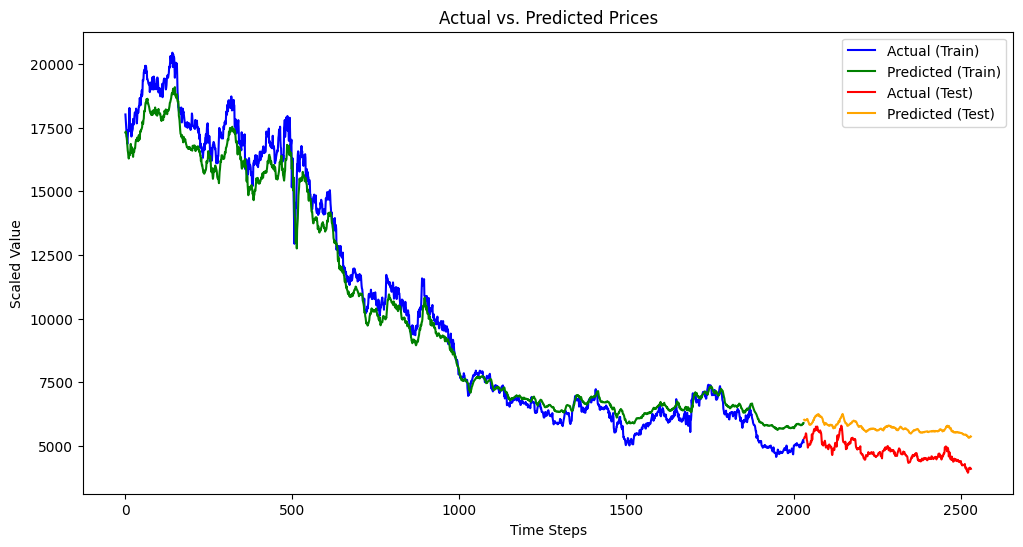

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(ytrain[0], label='Actual (Train)', color='blue')
plt.plot(trainpredict[:, 0], label='Predicted (Train)', color='green')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), ytest[0], label='Actual (Test)', color='red')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), testpredict[:, 0], label='Predicted (Test)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.show()
